In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


#### Cоздание моделей для прогнозирования топливной экономичности автомобилей конца 1970-х и начала 1980-х годов.

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
raw_dataset.shape

(398, 8)

In [5]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
df = raw_dataset.copy()
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
df.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(392, 8)

In [11]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [12]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [13]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [14]:
X = df.copy()
y = X.pop('MPG')

In [15]:
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [16]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 392, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [18]:
df[['MPG', 'Cylinders', 'Displacement', 'Weight']]

,MPG,Cylinders,Displacement,Weight
0,18.0,8,307.0,3504.0
1,15.0,8,350.0,3693.0
2,18.0,8,318.0,3436.0
3,16.0,8,304.0,3433.0
4,17.0,8,302.0,3449.0
...,...,...,...,...
393,27.0,4,140.0,2790.0
394,44.0,4,97.0,2130.0
395,32.0,4,135.0,2295.0
396,28.0,4,120.0,2625.0


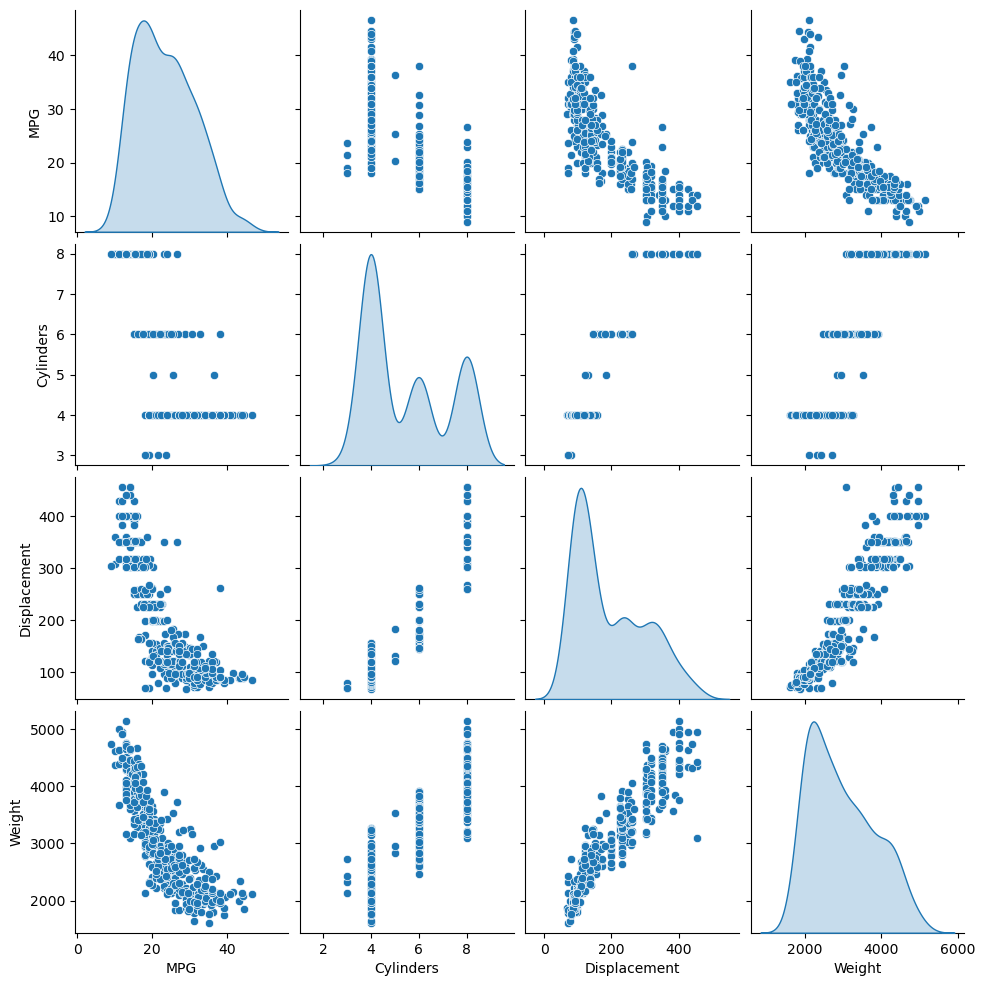

In [19]:
sns.pairplot(df[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [20]:
X.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Cylinders,392.0,5.47,1.71,3.0,4.00,4.0,8.00,8.0
Displacement,392.0,194.41,104.64,68.0,105.00,151.0,275.75,455.0
Horsepower,392.0,104.47,38.49,46.0,75.00,93.5,126.00,230.0
Weight,392.0,2977.58,849.40,1613.0,2225.25,2803.5,3614.75,5140.0
Acceleration,392.0,15.54,2.76,8.0,13.78,15.5,17.02,24.8
Model Year,392.0,75.98,3.68,70.0,73.00,76.0,79.00,82.0
Europe,392.0,0.17,0.38,0.0,0.00,0.0,0.00,1.0
Japan,392.0,0.20,0.40,0.0,0.00,0.0,0.00,1.0
USA,392.0,0.62,0.48,0.0,0.00,1.0,1.00,1.0


Нормировка

In [21]:
X.describe().transpose()[['mean', 'std']]

,mean,std
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [23]:
normalizer.adapt(np.array(X))

In [24]:
print(normalizer.mean.numpy())

[[   5.472  194.412  104.469 2977.584   15.541   75.98     0.173    0.202
     0.625]]


In [25]:
first = np.array(X[:1])

with np.printoptions(precision=2):
    print('Первый пример:', first)
    print()
    print('Нормализованный:', normalizer(first).numpy())

Первый пример: [[   8.  307.  130. 3504.   12.   70.    0.    0.    1.]]

Нормализованный: [[ 1.48  1.08  0.66  0.62 -1.29 -1.63 -0.46 -0.5   0.77]]


#### Построение линейной модели от лошадиных сил

In [26]:
horsepower = np.array(X_train['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(np.array(X['Horsepower']))

In [27]:
X_train['Horsepower']

338     84.0
189    120.0
100     88.0
52      76.0
49      86.0
       ...  
150     93.0
155     72.0
71      97.0
75     150.0
165    110.0
Name: Horsepower, Length: 250, dtype: float64

In [28]:
horsepower

array([ 84., 120.,  88.,  76.,  86., 105., 153.,  53., 100., 150.,  96.,
       140.,  96.,  88.,  64.,  75., 110., 105., 150., 140., 225.,  98.,
        75.,  88.,  78.,  70., 140., 170., 175.,  71., 158.,  95., 100.,
        70.,  86.,  94.,  90.,  71., 150.,  85.,  88.,  70.,  80., 110.,
        85., 210.,  90.,  86., 145.,  65.,  65.,  96.,  88.,  90.,  53.,
        70.,  90.,  52., 170.,  85.,  63., 139.,  80.,  83.,  75.,  90.,
        70.,  52.,  65.,  95.,  76.,  91., 152.,  95., 105.,  68., 150.,
        88., 107.,  61.,  85.,  97., 102., 116.,  84., 110., 112.,  80.,
        88.,  88.,  82.,  88., 100., 180., 150., 133.,  75., 215., 208.,
        63., 193.,  90., 150.,  90., 110., 105., 149.,  85.,  60.,  60.,
        90.,  75.,  48.,  95., 200.,  77.,  70.,  67.,  68.,  88., 105.,
        92., 100.,  88., 120.,  75., 100.,  81.,  80., 110.,  87., 148.,
       140.,  90., 108.,  65., 150.,  92.,  92.,  88., 145., 145.,  67.,
        46., 165.,  70., 110.,  67., 100.,  81., 13

In [29]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [30]:
horsepower[:10]

array([ 84., 120.,  88.,  76.,  86., 105., 153.,  53., 100., 150.])

In [31]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 58ms/step


array([[-0.004],
       [ 0.003],
       [-0.004],
       [-0.006],
       [-0.004],
       [ 0.   ],
       [ 0.011],
       [-0.011],
       [-0.001],
       [ 0.01 ]], dtype=float32)

In [32]:
y_train.values[:10]

array([27.2, 15.5, 18. , 30. , 23. , 23.2, 14. , 33. , 19. , 13. ])

In [33]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [34]:
%%time
history = horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 23.4433 - val_loss: 22.2166
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 22.7028 - val_loss: 21.5410
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 21.9607 - val_loss: 20.8476
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 21.2411 - val_loss: 20.1594
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 20.5162 - val_loss: 19.4773
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 19.7759 - val_loss: 18.7923
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 19.0443 - val_loss: 18.1104
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 18.3150 - val_loss: 17.4319
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 17.5586 - val_loss: 16.7528
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 16.8249 - val_loss: 16.0742
Epoch 11

7/7 [==============================] - 0s 5ms/step - loss: 3.7010 - val_loss: 4.0675
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7010 - val_loss: 4.0728
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7072 - val_loss: 4.0721
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7070 - val_loss: 4.0681
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7016 - val_loss: 4.0642
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7078 - val_loss: 4.0507
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6998 - val_loss: 4.0448
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 3.7006 - val_loss: 4.0427
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 3.7031 - val_loss: 4.0382
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 3.6992 - val_loss: 4.0403
Epoch 94/100
7/7 [===============

In [35]:
history.history

{'loss': [23.443330764770508,
  22.7027587890625,
  21.960744857788086,
  21.241069793701172,
  20.516172409057617,
  19.775876998901367,
  19.0443115234375,
  18.315004348754883,
  17.55858039855957,
  16.8249454498291,
  16.09039878845215,
  15.347576141357422,
  14.619770050048828,
  13.900052070617676,
  13.149161338806152,
  12.412075996398926,
  11.677724838256836,
  10.953386306762695,
  10.231283187866211,
  9.512537956237793,
  8.806893348693848,
  8.15173053741455,
  7.499617099761963,
  6.930222034454346,
  6.4063944816589355,
  5.941585540771484,
  5.532222270965576,
  5.183230400085449,
  4.886334419250488,
  4.621982574462891,
  4.398397922515869,
  4.206082820892334,
  4.028814792633057,
  3.9242398738861084,
  3.862260341644287,
  3.8299567699432373,
  3.7913739681243896,
  3.761554002761841,
  3.755610466003418,
  3.7365071773529053,
  3.730586528778076,
  3.7236697673797607,
  3.7157137393951416,
  3.7102091312408447,
  3.707972526550293,
  3.705681085586548,
  3.7050

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.701138,4.060141,95
96,3.702194,4.064266,96
97,3.700078,4.068003,97
98,3.702938,4.067770,98
99,3.706524,4.072988,99


In [37]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

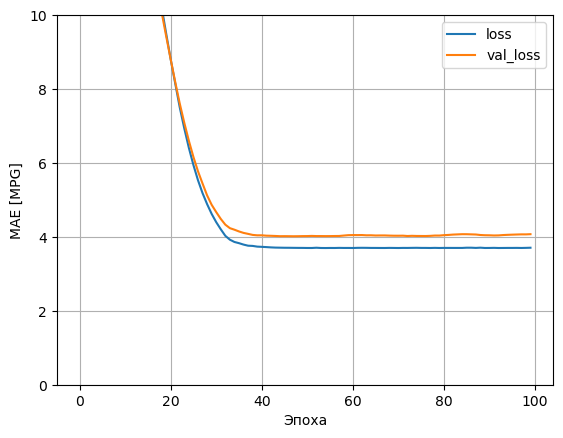

In [38]:
plot_loss(history)

In [39]:
horsepower_model.evaluate(X_test['Horsepower'], y_test, verbose=0)

4.281440258026123

In [40]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(X_test['Horsepower'], 
                                                             y_test, verbose=0)

In [41]:
test_results

{'horsepower_model': 4.281440258026123}

In [42]:
tf.linspace(0.0, 250, 251)

<tf.Tensor: shape=(251,), dtype=float32, numpy=
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
   

In [43]:
x = tf.linspace(0.0, 250, 251)
prediction = horsepower_model.predict(x)

8/8 [==============================] - 0s 720us/step


In [44]:
def plot_horsepower(x_train, y_train, x, prediction):
    plt.scatter(x_train, y_train, label='Data')
    plt.plot(x, prediction, color='k', label='Predictions')
    plt.xlabel('T')
    plt.ylabel('MPG')
    plt.legend()

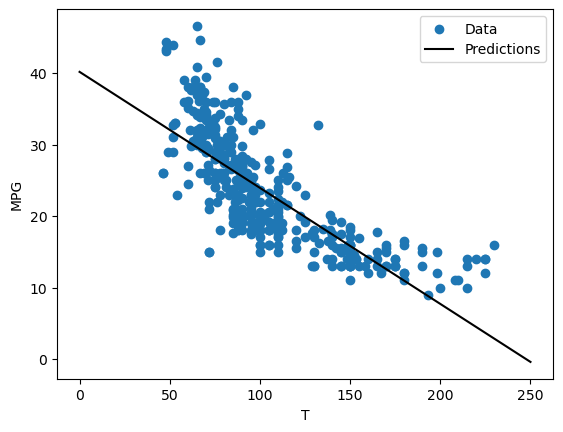

In [45]:
plot_horsepower(X['Horsepower'], y, x, prediction)

#### Построение линейной модели

In [46]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [47]:
linear_model.predict(X_train[:10])

1/1 [==============================] - 0s 34ms/step


array([[-1.164],
       [-1.496],
       [ 0.085],
       [ 3.066],
       [ 1.02 ],
       [-1.004],
       [-1.026],
       [ 2.734],
       [ 0.652],
       [-1.72 ]], dtype=float32)

In [48]:
y_train[:10]

338    27.2
189    15.5
100    18.0
52     30.0
49     23.0
271    23.2
65     14.0
181    33.0
33     19.0
137    13.0
Name: MPG, dtype: float64

In [49]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [50]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 0s 31ms/step - loss: 23.3027 - val_loss: 21.9040
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 22.2981 - val_loss: 21.3250
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 21.3483 - val_loss: 20.6980
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 20.4092 - val_loss: 20.0615
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 19.5108 - val_loss: 19.4605
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 18.5274 - val_loss: 18.8479
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 17.6687 - val_loss: 18.2163
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 16.8702 - val_loss: 17.5754
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 16.1483 - val_loss: 16.9490
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 15.4781 - val_loss: 16.3303
Epoch 11

7/7 [==============================] - 0s 4ms/step - loss: 2.4144 - val_loss: 2.9825
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3320 - val_loss: 2.9774
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3730 - val_loss: 2.9616
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3390 - val_loss: 2.9387
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3601 - val_loss: 2.9280
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 2.4119 - val_loss: 2.9556
Epoch 90/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3227 - val_loss: 2.9563
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3385 - val_loss: 2.9620
Epoch 92/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3529 - val_loss: 2.9310
Epoch 93/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3414 - val_loss: 2.9251
Epoch 94/100
7/7 [===============

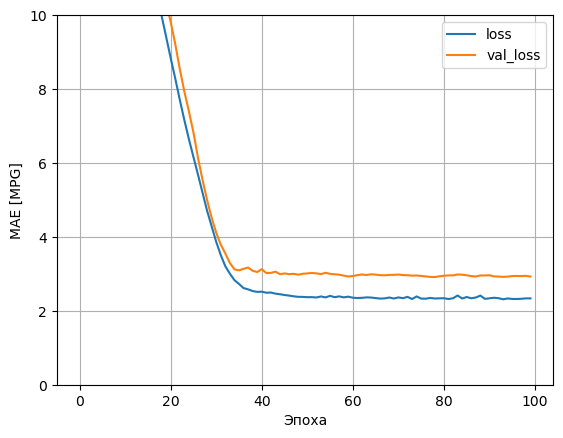

In [51]:
plot_loss(history)

In [52]:
test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)

In [53]:
test_results

{'horsepower_model': 4.281440258026123, 'linear_model': 2.549293041229248}

#### Построение многойлойного персептрона

In [54]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [55]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [56]:
%%time
history = dnn_horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 3.67 s
Wall time: 2.88 s


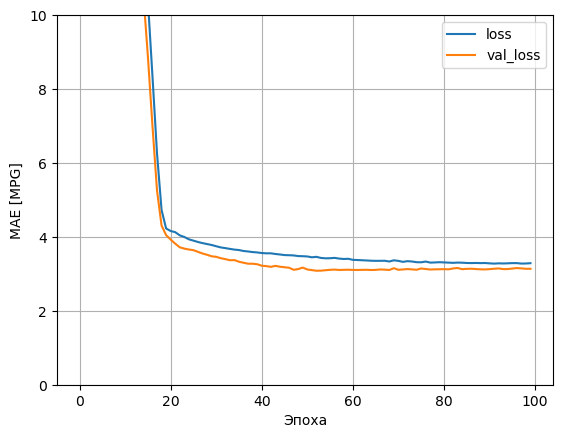

In [57]:
plot_loss(history)

8/8 [==============================] - 0s 710us/step


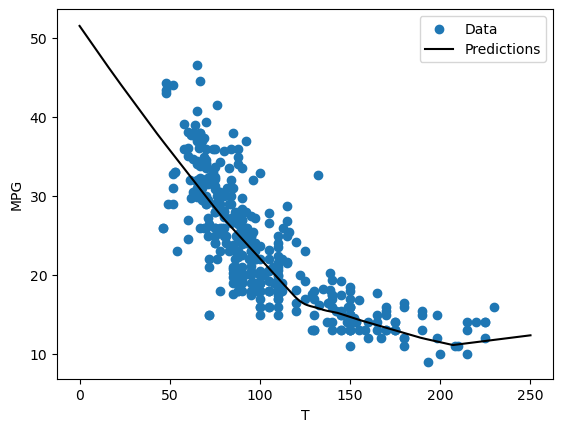

In [58]:
x = tf.linspace(0.0, 250, 251)
prediction = dnn_horsepower_model.predict(x)
plot_horsepower(X['Horsepower'], y, x, prediction)

In [59]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    X_test['Horsepower'], y_test, verbose=0)

In [60]:
test_results

{'horsepower_model': 4.281440258026123,
 'linear_model': 2.549293041229248,
 'dnn_horsepower_model': 3.620435953140259}

In [61]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [62]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=300)

CPU times: total: 9.78 s
Wall time: 7.87 s


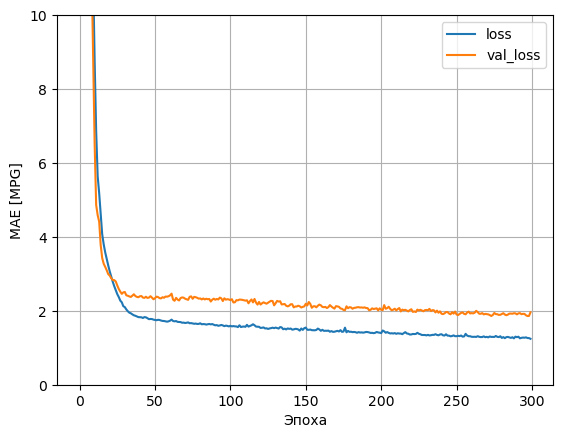

In [63]:
plot_loss(history)

In [64]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [65]:
test_results

{'horsepower_model': 4.281440258026123,
 'linear_model': 2.549293041229248,
 'dnn_horsepower_model': 3.620435953140259,
 'dnn_model': 1.9775199890136719}

In [66]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.281440
linear_model,2.549293
dnn_horsepower_model,3.620436
dnn_model,1.977520


3/3 [==============================] - 0s 1000us/step


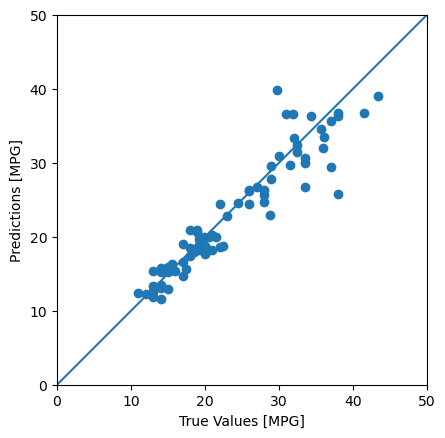

In [67]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

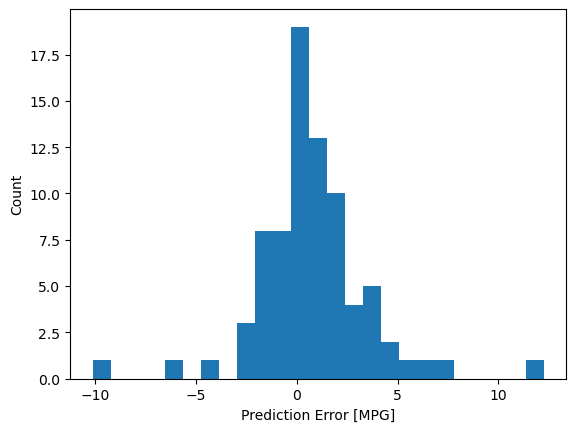

In [68]:
error = y_test - test_predictions
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

### Эксперименты с моделями

In [69]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,044
Trainable params: 9,025
Non-trainable params: 19
___________________________________________________

CPU times: total: 10.7 s
Wall time: 8.42 s


2.0281193256378174

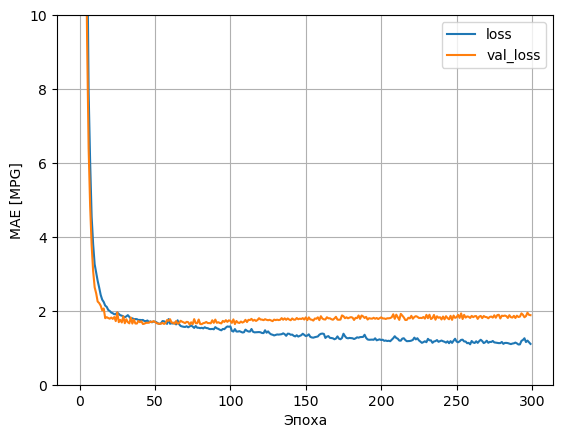

In [70]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300)
plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

### Можно сделать больше эпох

In [71]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [72]:
log_dir

'logs/fit/20221121-200623'

Epoch 1/300
8/8 [==============================] - 1s 75ms/step - loss: 23.3985 - val_loss: 22.2993
Epoch 2/300
8/8 [==============================] - 0s 46ms/step - loss: 22.7133 - val_loss: 21.4443
Epoch 3/300
8/8 [==============================] - 0s 41ms/step - loss: 21.7294 - val_loss: 20.1163
Epoch 4/300
8/8 [==============================] - 0s 38ms/step - loss: 20.0908 - val_loss: 17.8479
Epoch 5/300
8/8 [==============================] - 0s 31ms/step - loss: 17.2841 - val_loss: 14.0391
Epoch 6/300
8/8 [==============================] - 0s 41ms/step - loss: 12.9786 - val_loss: 9.3318
Epoch 7/300
8/8 [==============================] - 0s 37ms/step - loss: 7.9520 - val_loss: 6.4520
Epoch 8/300
8/8 [==============================] - 0s 36ms/step - loss: 6.3186 - val_loss: 5.2954
Epoch 9/300
8/8 [==============================] - 0s 34ms/step - loss: 4.7650 - val_loss: 3.5908
Epoch 10/300
8/8 [==============================] - 0s 36ms/step - loss: 3.6814 - val_loss: 3.0178
Epoch 11

8/8 [==============================] - 0s 33ms/step - loss: 1.5450 - val_loss: 1.7196
Epoch 84/300
8/8 [==============================] - 0s 33ms/step - loss: 1.5458 - val_loss: 1.8117
Epoch 85/300
8/8 [==============================] - 0s 33ms/step - loss: 1.5468 - val_loss: 1.7296
Epoch 86/300
8/8 [==============================] - 0s 33ms/step - loss: 1.5161 - val_loss: 1.7258
Epoch 87/300
8/8 [==============================] - 0s 36ms/step - loss: 1.4887 - val_loss: 1.7628
Epoch 88/300
8/8 [==============================] - 0s 36ms/step - loss: 1.5182 - val_loss: 1.7501
Epoch 89/300
8/8 [==============================] - 0s 31ms/step - loss: 1.4983 - val_loss: 1.7065
Epoch 90/300
8/8 [==============================] - 0s 30ms/step - loss: 1.5226 - val_loss: 1.7485
Epoch 91/300
8/8 [==============================] - 0s 31ms/step - loss: 1.4848 - val_loss: 1.8772
Epoch 92/300
8/8 [==============================] - 0s 31ms/step - loss: 1.5527 - val_loss: 1.7203
Epoch 93/300
8/8 [=====

8/8 [==============================] - 0s 38ms/step - loss: 1.3227 - val_loss: 1.7809
Epoch 166/300
8/8 [==============================] - 0s 41ms/step - loss: 1.3192 - val_loss: 1.8069
Epoch 167/300
8/8 [==============================] - 0s 33ms/step - loss: 1.2864 - val_loss: 1.8882
Epoch 168/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2794 - val_loss: 1.8948
Epoch 169/300
8/8 [==============================] - 0s 36ms/step - loss: 1.3022 - val_loss: 1.8127
Epoch 170/300
8/8 [==============================] - 0s 39ms/step - loss: 1.2920 - val_loss: 1.8169
Epoch 171/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2911 - val_loss: 1.8159
Epoch 172/300
8/8 [==============================] - 0s 38ms/step - loss: 1.3147 - val_loss: 1.8591
Epoch 173/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2345 - val_loss: 1.8529
Epoch 174/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2749 - val_loss: 1.8109
Epoch 175/300


8/8 [==============================] - 0s 35ms/step - loss: 1.1829 - val_loss: 1.8363
Epoch 248/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2239 - val_loss: 1.7898
Epoch 249/300
8/8 [==============================] - 0s 35ms/step - loss: 1.2079 - val_loss: 1.8404
Epoch 250/300
8/8 [==============================] - 0s 39ms/step - loss: 1.2942 - val_loss: 1.8800
Epoch 251/300
8/8 [==============================] - 0s 39ms/step - loss: 1.2326 - val_loss: 1.8046
Epoch 252/300
8/8 [==============================] - 0s 36ms/step - loss: 1.2426 - val_loss: 1.8267
Epoch 253/300
8/8 [==============================] - 0s 39ms/step - loss: 1.1735 - val_loss: 1.9491
Epoch 254/300
8/8 [==============================] - 0s 39ms/step - loss: 1.2106 - val_loss: 1.8987
Epoch 255/300
8/8 [==============================] - 0s 38ms/step - loss: 1.2234 - val_loss: 1.8006
Epoch 256/300
8/8 [==============================] - 0s 36ms/step - loss: 1.1527 - val_loss: 1.8372
Epoch 257/300


2.018278121948242

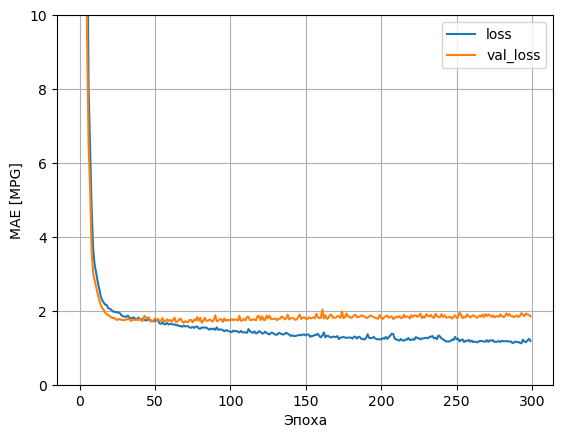

In [73]:
dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=1, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

In [74]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_16 (Dense)            (None, 128)               1280      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,620
Trainable params: 9,601
Non-trainable params: 19
_________________________________________________________________


1.9118101596832275

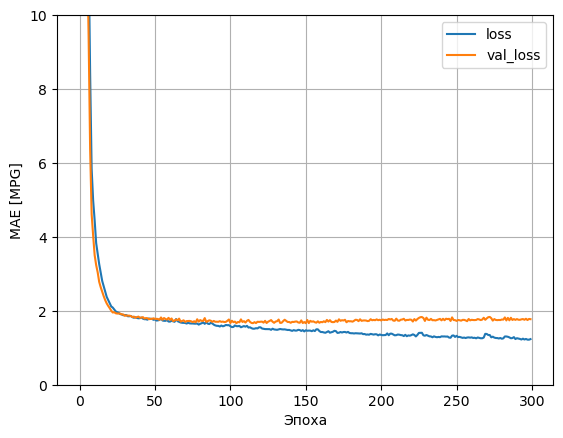

In [75]:
log_dir = "logs/fit/128-43-relu"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

### Добавление dropout

In [ ]:
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

log_dir = "logs/fit/128-do-64do"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

2.0171573162078857

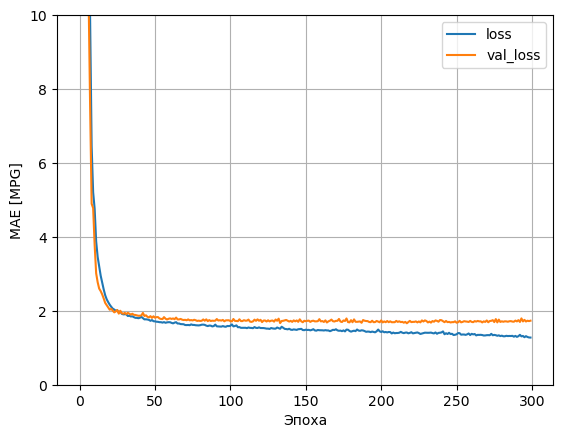

In [77]:
dnn_model = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

1.9277966022491455

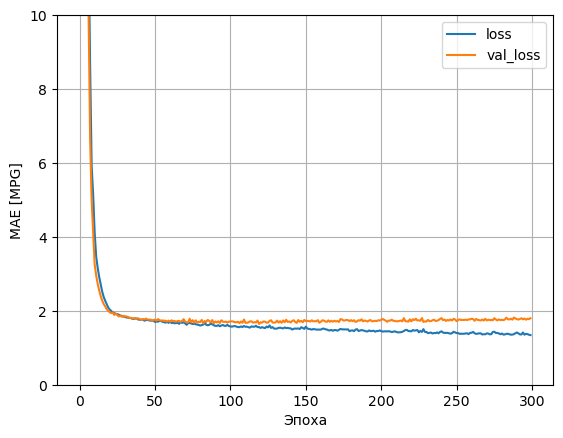

In [78]:
dnn_model = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.RMSprop(0.01) )

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

## Случайный лес

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyEr

[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=4, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=5, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, max_features=auto, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=sqrt, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, 

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200, total=   0.0s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500, total=   0.3s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500, total=   0.1s
[CV] criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500 


C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    8.7s finished


[CV]  criterion=squared_error, max_depth=6, max_features=log2, n_estimators=500, total=   0.1s


KeyError: 'squared_error'

In [82]:
rf = GSCV.best_estimator_
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [83]:
rf = RandomForestRegressor(GSCV.best_params_)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators={'criterion': 'squared_error',
                                    'max_depth': 4, 'max_features': 'auto',
                                    'n_estimators': 100},
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=6, 
                           max_features='auto', n_estimators=500)

In [85]:
rf.fit(X_train, y_train)

KeyError: 'squared_error'

In [ ]:
test_predictions = rf.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.predict(X_test)

In [ ]:
np.mean((y_test - np.mean(y_test))*(y_test - np.mean(y_test)))

In [ ]:
prediction=rf.predict(X_test)

In [ ]:
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
pd.DataFrame(GSCV.cv_results_)

In [ ]:
plt.hist(pd.DataFrame(GSCV.cv_results_)['mean_test_score'])

### Лассо

In [ ]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
GSCV = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
model=GSCV.best_estimator_

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
prediction=model.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

### k ближайших соседей

In [ ]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))